valeur propre de plus grand module :  [[5.]]
vecteur propre associé :
 [[0.8944]
 [0.4472]
 [0.    ]]
nombre d'itération :  21


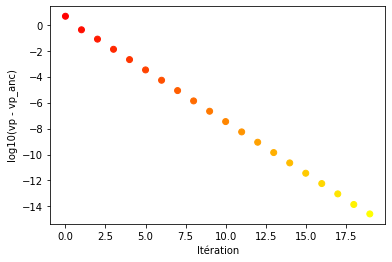

(matrix([[5.]]),
 matrix([[8.94427191e-01],
         [4.47213595e-01],
         [4.91716548e-09]]),
 21)

In [4]:
#Q1  #Q2 

import numpy as np
import matplotlib.pyplot as plt
import math

def puissance_iter(A, y0, eps): 
    vp = 0
    vp_anc = 1
    y = y0
    n = 0
    while abs(vp - vp_anc) > eps:
        n += 1
        vp_anc = vp
        x = y/np.linalg.norm(y)
        y = np.dot(A,x)
        vp = np.dot(x.T,y)/np.dot(x.T,x)
        
    return (vp, x, n)

def puissance_iter_graphe(A, y0, eps):
    trace_conv =[] 
    vp = 0
    vp_anc = 1
    y = y0
    n = 0
    while abs(vp - vp_anc) > eps:
        trace_conv.append(math.log10(abs(vp - vp_anc)))
        n += 1
        vp_anc = vp
        x = y/np.linalg.norm(y)
        y = np.dot(A,x)
        vp = np.dot(x.T,y)/np.dot(x.T,x)
        
    print("valeur propre de plus grand module : ", vp)
    print("vecteur propre associé :\n", np.matrix.round(x, 4))
    print("nombre d'itération : ", n)
    
    L = [i for i in range(n-1)]
    trace_conv.pop(0)
    

    
    plt.scatter(L, trace_conv, c=L, cmap='autumn')
    plt.xlabel("Itération")
    plt.ylabel("log10(vp - vp_anc)")
    plt.show()
        
    return (vp, x, n)
    

A=np.matrix([[3,4,0],[1,3,0],[0,0,2]])
eps=1E-15 #la précision double (la précison simple =1e-7)
x0= np.matrix([2,1,1]).T


puissance_iter_graphe(A,x0,eps)


In [5]:
#Q3


def deflation(A,x0,eps):
    valeur_propre = []
    
    res = puissance_iter(A,x0,eps)
    
    B = A
    
    while (round(res[0][0,0]) != 0):
        valeur_propre.append(res[0][0,0])
        B = B - res[0][0,0] *np.dot(res[1],res[1].T)/np.dot(res[1].T,res[1])
        res = puissance_iter(B,x0,eps)
        
    return valeur_propre

A=np.matrix([[1,2,3],[2,1,2],[3,2,1]])
eps=1E-15 #la précision double (la précison simple =1e-7)
x0= np.matrix([2,1,1]).T

deflation(A,x0,eps)



[5.701562118716425, -1.9999999999999998, -0.7015621187164245]

In [6]:
#Q4


G = np.zeros((500,500))



def read_webgraph():
    with open("webgraph.dat", "r") as file:
        for line in file:
            index1, index2 = map(int, line.split())
            G[index1-1][index2-1] = 1
    file.close()
    
    
    
read_webgraph()
print(G)


[[0. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 0. 1. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]]


In [39]:
#Q5

A = np.ones((500,500))*1/500

def sum_col(j):
    sum = 0
    for row in G:
        sum += row[j]
        
    return int(sum)

def cons_A(d):
    for j in range(500):
        lj = sum_col(j)
        if lj:
            for i in range(500):
                A[i,j] = d/500 + ((1-d)/lj) * G[i,j]   
                
cons_A(0.2)
print(A)

[[0.0004     0.00211306 0.00211674 ... 0.0004     0.0004     0.0004    ]
 [0.0004     0.0004     0.0004     ... 0.0004     0.0004     0.0004    ]
 [0.00206667 0.00211306 0.0004     ... 0.0004     0.0004     0.0004    ]
 ...
 [0.00206667 0.00211306 0.00211674 ... 0.0004     0.2004     0.0004    ]
 [0.00206667 0.00211306 0.00211674 ... 0.2004     0.0004     0.0004    ]
 [0.00206667 0.00211306 0.00211674 ... 0.0004     0.0004     0.0004    ]]


In [58]:
#Q6

x0 = np.ones(500).T

res = puissance_iter(A,x0,eps)

populaire = np.sort(res[1])

populaire = populaire[480:] 

print("les vingt pages les plus populaires sont :\n ")

j = 0
for i in range(20):
    while res[1][j] != populaire[19 - i]:
        j += 1
    if i == 0:
        print(i+1,"er : ",j, " avec ",populaire[19-i])
    else:
        print(i+1,"eme : ",j, " avec ",populaire[19-i])
    j = 0


les vingt pages les plus populaires sont :
 
1 er :  5  avec  0.69260749221558
2 eme :  54  avec  0.6535988801652997
3 eme :  157  avec  0.101592942022198
4 eme :  159  avec  0.09588649470128685
5 eme :  160  avec  0.09588649470128682
6 eme :  158  avec  0.09287859498876402
7 eme :  175  avec  0.0882851444849724
8 eme :  176  avec  0.08080490209097896
9 eme :  177  avec  0.08052358314256877
10 eme :  152  avec  0.06092051817666953
11 eme :  43  avec  0.05400610894971062
12 eme :  223  avec  0.04977432204922208
13 eme :  75  avec  0.04772184266553603
14 eme :  279  avec  0.04622627633393327
15 eme :  155  avec  0.021219673309227284
16 eme :  156  avec  0.02121967330922728
17 eme :  189  avec  0.020639361466849915
18 eme :  189  avec  0.020639361466849915
19 eme :  190  avec  0.02063936146684991
20 eme :  190  avec  0.02063936146684991


In [61]:
#Q7

I = np.identity(500)
x = np.zeros(500)

print(A-I)

np.linalg.solve((A-I),x)


[[-9.99600000e-01  2.11306210e-03  2.11673820e-03 ...  4.00000000e-04
   4.00000000e-04  4.00000000e-04]
 [ 4.00000000e-04 -9.99600000e-01  4.00000000e-04 ...  4.00000000e-04
   4.00000000e-04  4.00000000e-04]
 [ 2.06666667e-03  2.11306210e-03 -9.99600000e-01 ...  4.00000000e-04
   4.00000000e-04  4.00000000e-04]
 ...
 [ 2.06666667e-03  2.11306210e-03  2.11673820e-03 ... -9.99600000e-01
   2.00400000e-01  4.00000000e-04]
 [ 2.06666667e-03  2.11306210e-03  2.11673820e-03 ...  2.00400000e-01
  -9.99600000e-01  4.00000000e-04]
 [ 2.06666667e-03  2.11306210e-03  2.11673820e-03 ...  4.00000000e-04
   4.00000000e-04 -9.99600000e-01]]


array([-0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0